In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')

# 資料整理

In [65]:
data=pd.read_csv("kidney_disease.csv")

In [66]:
print("資料筆數:",len(data))
print("欄位數量",len(data.columns))

資料筆數: 400
欄位數量 26


In [67]:
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [69]:
for i in data.drop("id",axis=1).columns:
    print('每個欄位的獨立值 in "{}":\n'.format(i),data[i].unique())

每個欄位的獨立值 in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
每個欄位的獨立值 in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
每個欄位的獨立值 in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
每個欄位的獨立值 in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
每個欄位的獨立值 in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
每個欄位的獨立值 in "rbc":
 [nan 'normal' 'abnormal']
每個欄位的獨立值 in "pc":
 ['normal' 'abnormal' nan]
每個欄位的獨立值 in "pcc":
 ['notpresent' 'present' nan]
每個欄位的獨立值 in "ba":
 ['notpresent' 'present' nan]
每個欄位的獨立值 in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86

In [70]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [71]:
#整理資料，把誤值的資料進行修正
for i in range(data.shape[0]):
    if data.iloc[i,25]=='ckd\t':
        data.iloc[i,25]='ckd'
    if data.iloc[i,20] in [' yes','\tyes']:
        data.iloc[i,20]='yes'
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,21]=='\tno':
        data.iloc[i,21]='no'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t43':
        data.iloc[i,16]='43'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,17]=='\t6200':
        data.iloc[i,17]= '6200'
    if data.iloc[i,17]=='\t8400':
        data.iloc[i,17]= '6200'
    if data.iloc[i,18]=='\t?':
        data.iloc[i,18]=np.nan
    if data.iloc[i,25]=='ckd':
        data.iloc[i,25]='yes'
    if data.iloc[i,25]=='notckd':
        data.iloc[i,25]='no'

In [72]:
#刪除id欄位
data.drop('id',axis=1,inplace=True)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,yes
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,yes
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,yes


In [73]:
#填上有意義的欄位名稱
feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
data.columns=feature_names

In [74]:
data

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,yes
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,yes
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,no


In [75]:
#再看一次整理後的資料
for i in data.columns:
    print("每個欄位的獨立值(整理後) in {}:\n".format(i),data[i].unique())

每個欄位的獨立值(整理後) in Age (yrs):
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
每個欄位的獨立值(整理後) in Blood Pressure (mm/Hg):
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
每個欄位的獨立值(整理後) in Specific Gravity:
 [1.02  1.01  1.005 1.015   nan 1.025]
每個欄位的獨立值(整理後) in Albumin:
 [ 1.  4.  2.  3.  0. nan  5.]
每個欄位的獨立值(整理後) in Sugar:
 [ 0.  3.  4.  1. nan  2.  5.]
每個欄位的獨立值(整理後) in Red Blood Cells:
 [nan 'normal' 'abnormal']
每個欄位的獨立值(整理後) in Pus Cells:
 ['normal' 'abnormal' nan]
每個欄位的獨立值(整理後) in Pus Cell Clumps:
 ['notpresent' 'present' nan]
每個欄位的獨立值(整理後) in Bacteria:
 ['notpresent' 'present' nan]
每個欄位的獨立值(整理後) in Blood Glucose Random (mgs/dL):
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99.

In [76]:
#有些欄位應該是數值，卻是object，因為有空值(nan)造成，以下三個欄位是肉眼觀察到的
mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

In [77]:
#看看數值型欄位
numeric

['Age (yrs)',
 'Blood Pressure (mm/Hg)',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random (mgs/dL)',
 'Blood Urea (mgs/dL)',
 'Serum Creatinine (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)']

In [78]:
#轉換為float
for col in mistyped:
        data[col]=data[col].astype('float')

In [79]:
#看看這三個欄位有無變化 (欄位轉程float後，nan並無發生錯誤的結果)
print(data['Packed Cell Volume'].unique())
print(data['White Blood Cells (cells/cmm)'].unique())
print(data['Red Blood Cells (millions/cmm)'].unique())

[44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]
[ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]
[5.2 nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1
 6.2 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6

In [80]:
#觀察這三個欄位的資料型態 (Packed Cell Volume, White Blood Cells (cells/cmm), Red Blood Cells (millions/cmm))
#已經為數值型 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

In [81]:
#接下來處理類別欄位，且排除掉我們的數值型欄位
#再排除應變數欄位
categoricals=[]
for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('Chronic Kidney Disease')

In [82]:
#看看類別欄位
categoricals

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia']

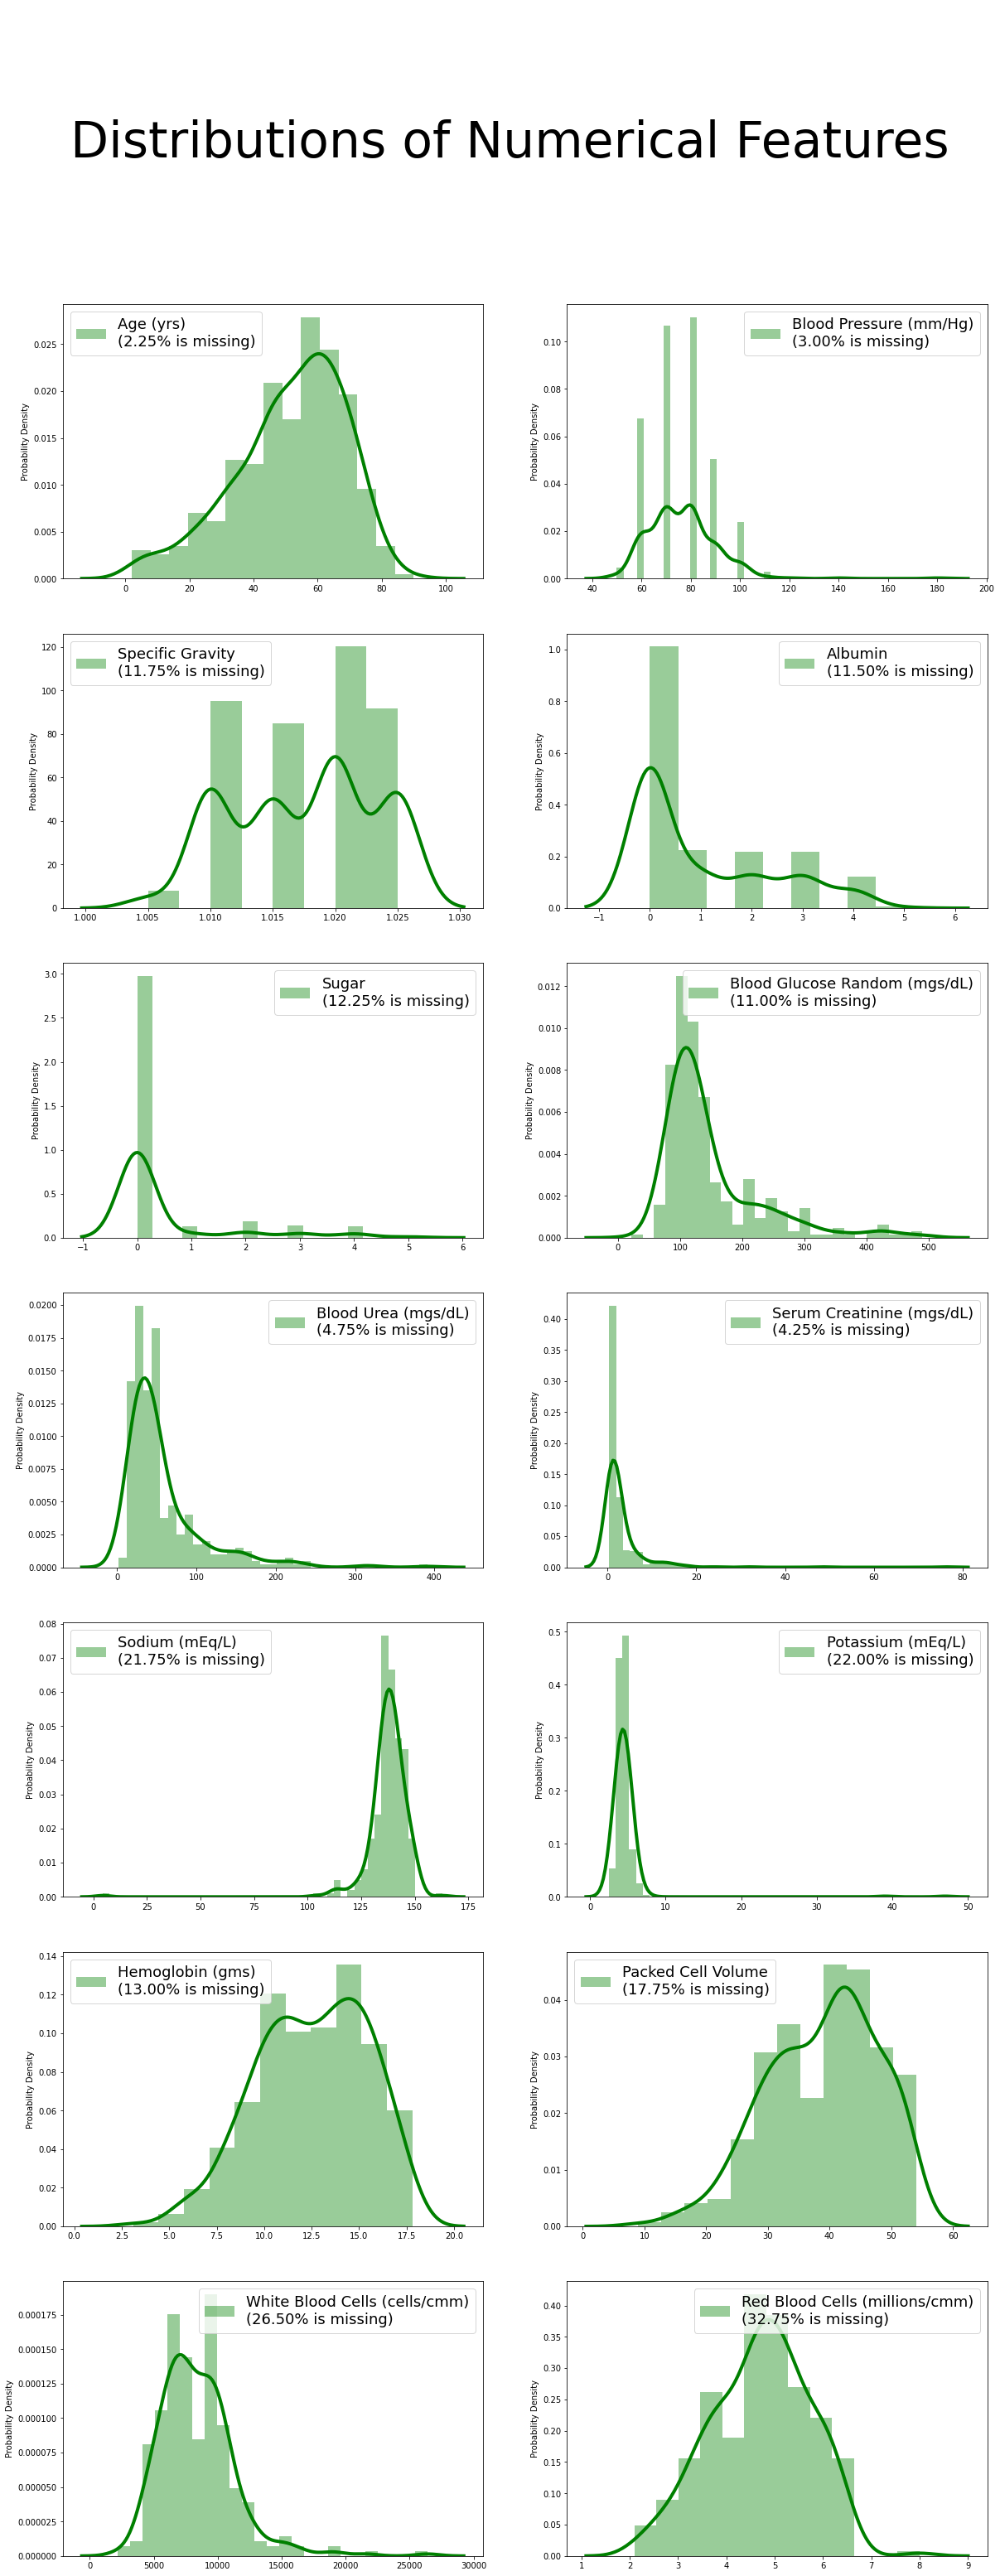

In [83]:
#一覽表視覺化，繪製 (7x2) 的圖表
#數值型欄位

#7x2的圖表
n_rows, n_cols = (7,2)

#每一張圖表大小為20x50
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))

#給予這張一覽表名稱
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

#走訪每一個數值型欄位
#陣列變為 index, column走訪方式，要透過enumerate
for index, column in enumerate(numeric):
    
    #index由0開始
    #例如: 5//2為2(商數)，5%2為1(餘數)
    i,j = (index // n_cols), (index % n_cols)
    
    #計算該欄位去除空值的數量除以該欄位總數量的百分比
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    #文字敘述該欄位遺缺值的百分比
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    #透過seaborn的distplot針對該欄位畫圖
    #需增加常態分佈的線條
    fig=sns.distplot(data[column], color="g", label=collabel, norm_hist=True,
    
    #指派圖形位置，KDE線條寬度為4
    ax=axes[i,j], kde_kws={"lw":4})
    
    #在圖片中顯示文字說明
    #顯示的位置由程式自行判斷 (loc為best)
    fig=fig.legend(loc='best', fontsize=18)
    
    #定義每張圖的y軸說明文字
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    #定義每張圖x軸說明文字為無
    axes[i,j].set_xlabel(None)

plt.show()

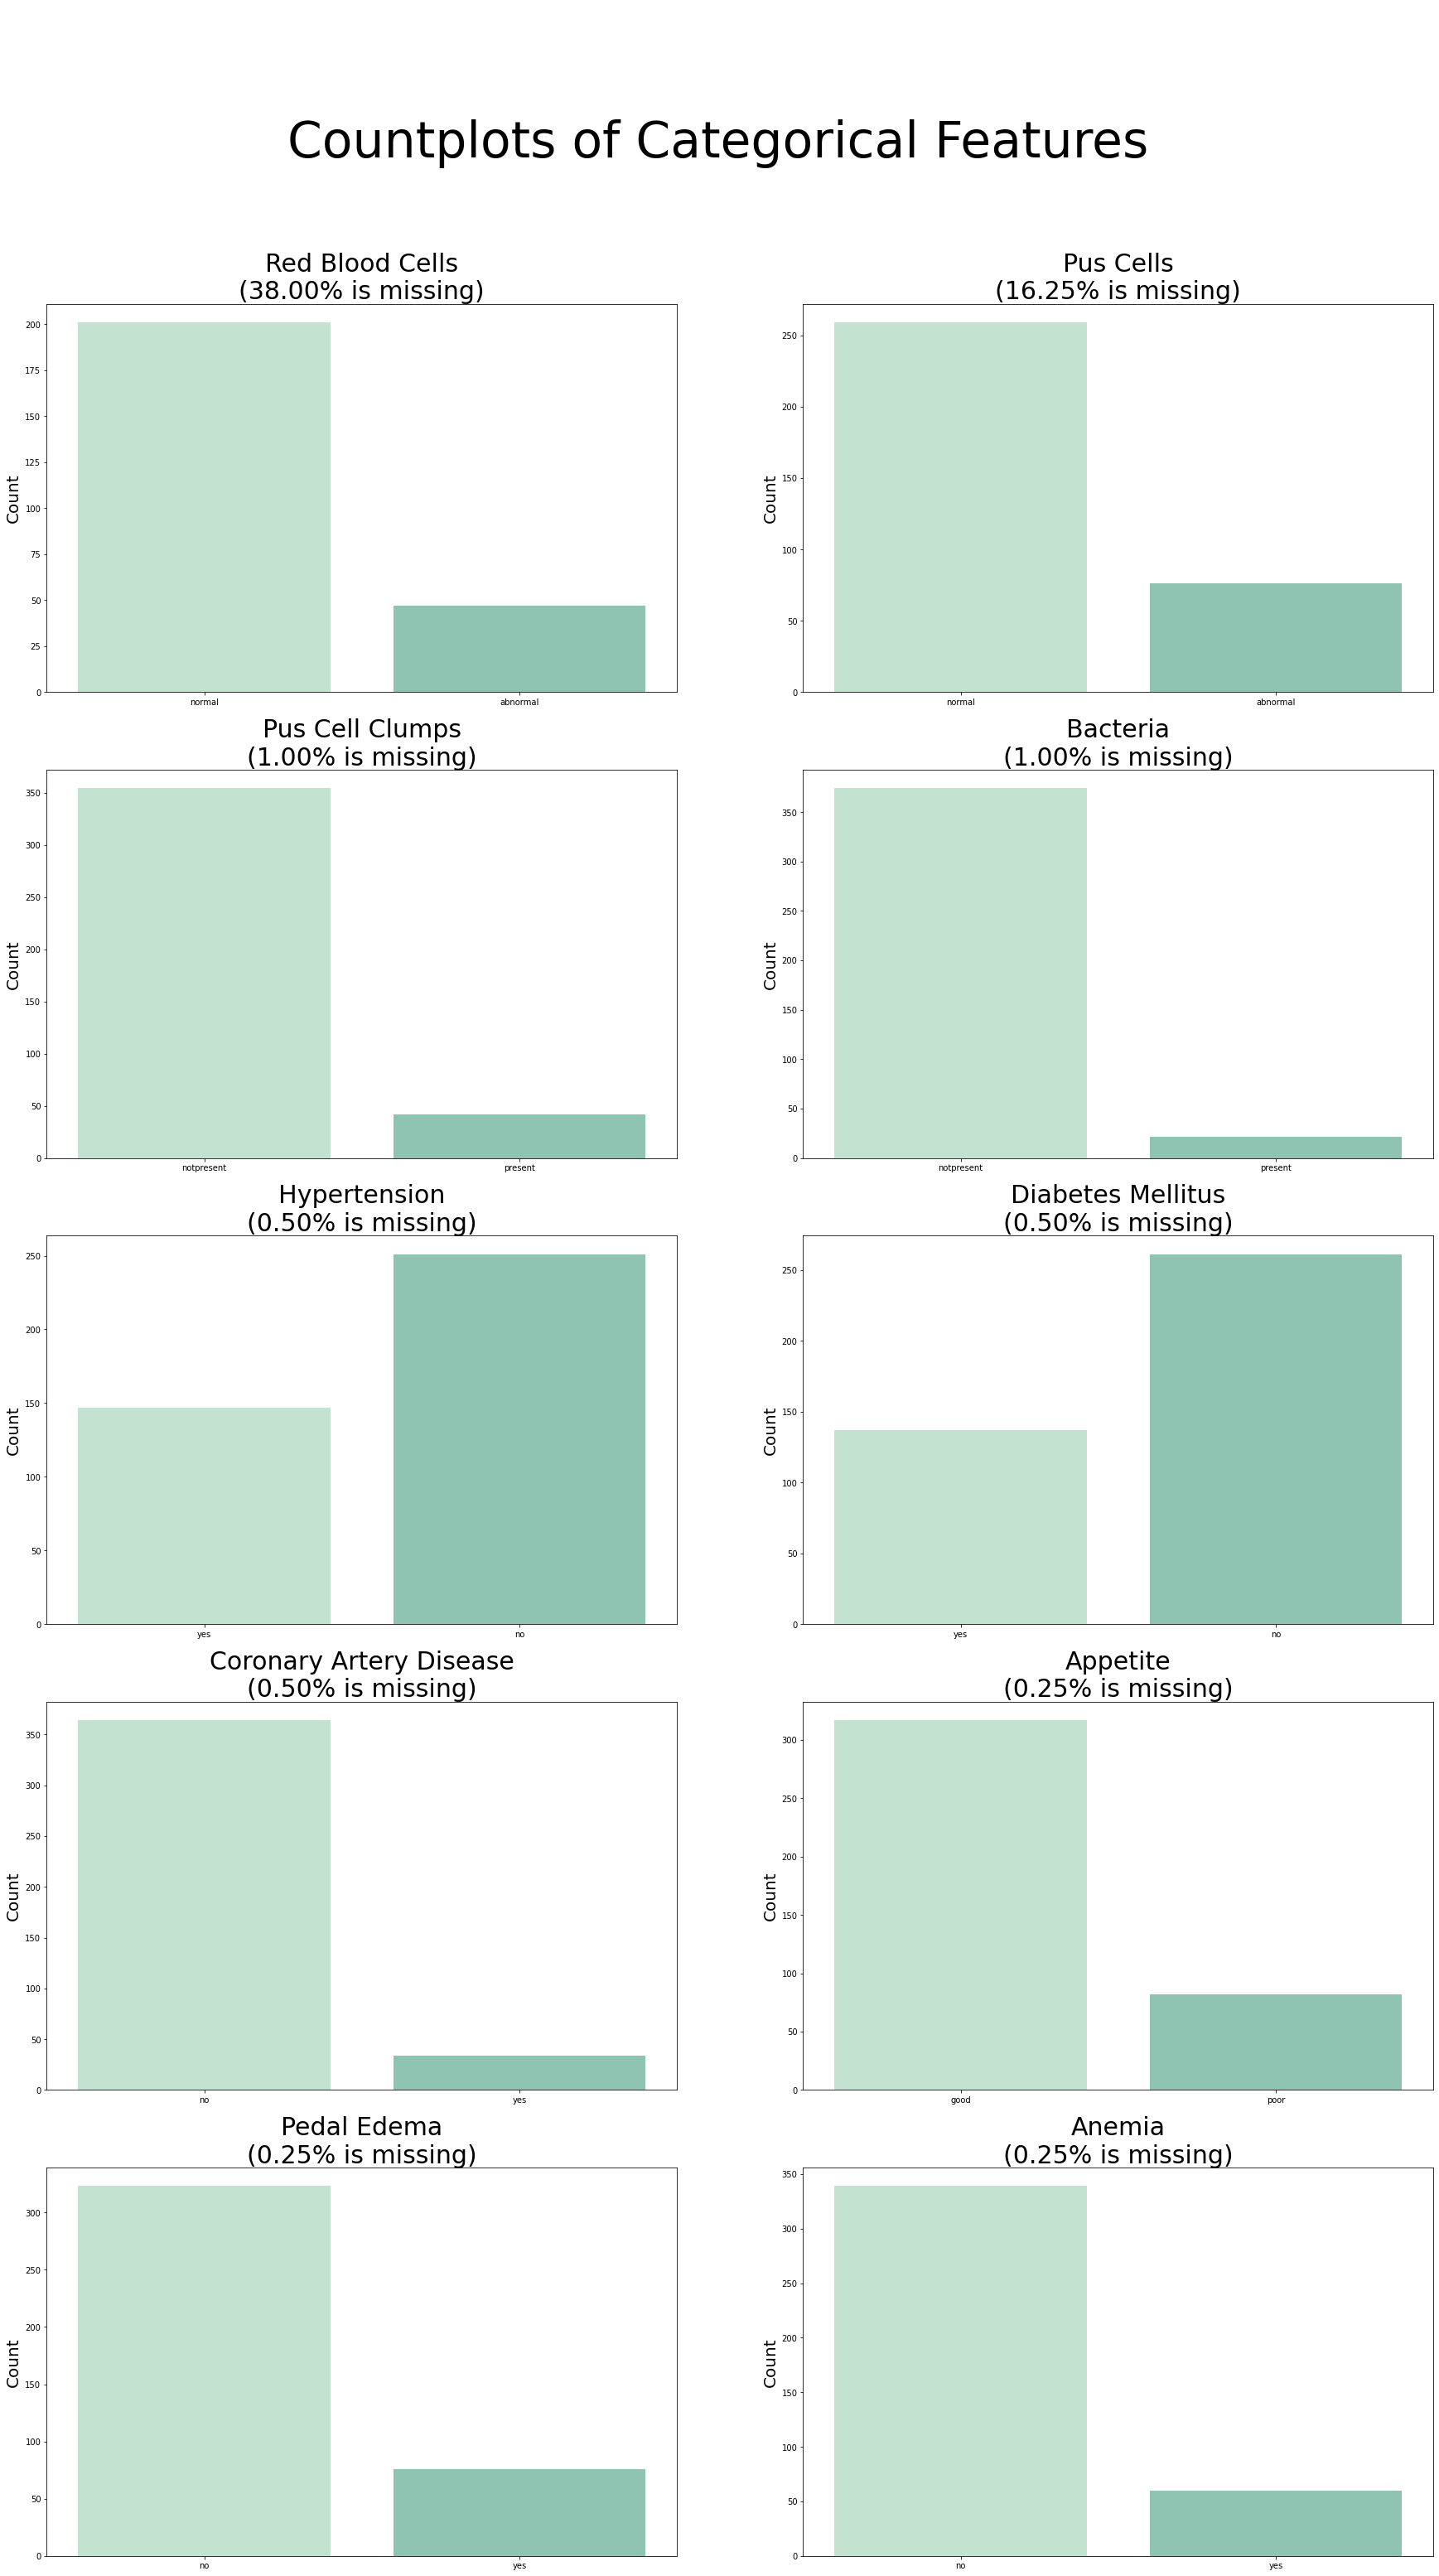

In [84]:
#類別型欄位

n_rows, n_cols = (5,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 50))
figure.suptitle('\n\nCountplots of Categorical Features', fontsize=60)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig = sns.countplot(x=column, data=data,label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),
    
    ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=30)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_ylabel("Count",fontsize=20)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), fontsize='medium')

plt.show()

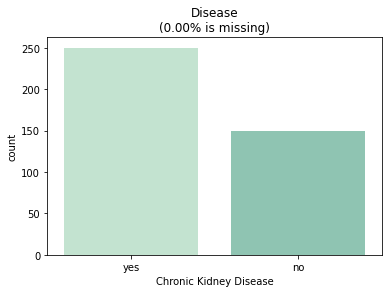

In [85]:
#應變數

miss_perc="%.2f"%(100*(1-(data['Chronic Kidney Disease'].dropna().shape[0])/data.shape[0]))
    
label="Disease\n(missing:\n{}%)".format(miss_perc)
fig=sns.countplot(x=data['Chronic Kidney Disease'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("Disease\n({}% is missing)".format(miss_perc))
plt.show()

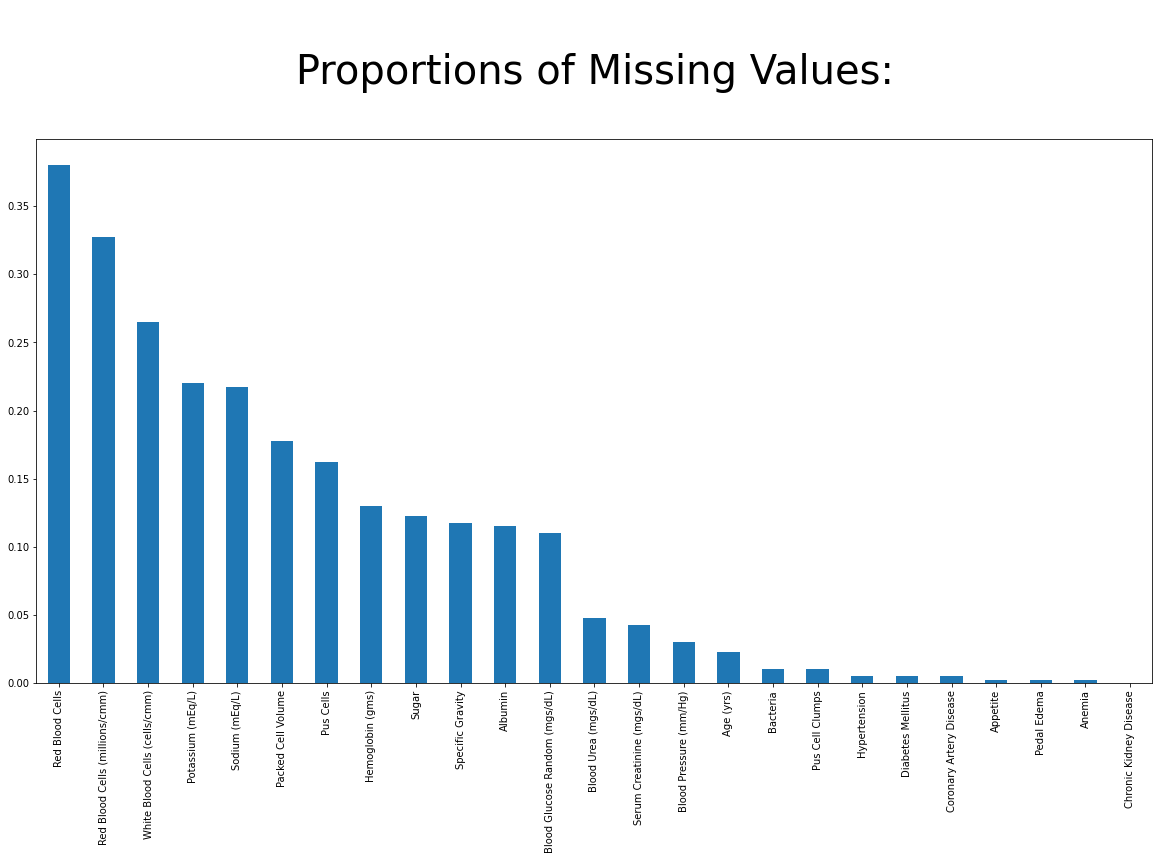

In [88]:
#展示遺缺值的比率
d=((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)
#畫一張圖，大小為20x10
d.plot(kind='bar', figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

In [89]:
#類別型欄位塞眾數
for col in categoricals:
    data[col]=data[col].fillna(data[col].mode()[0])

In [90]:
#數值型欄位塞中位數
for col in numeric:
    data[col]=data[col].fillna(data[col].mean())

In [91]:
#再次檢查欄位遺缺值狀態
data.isnull().any()

Age (yrs)                         False
Blood Pressure (mm/Hg)            False
Specific Gravity                  False
Albumin                           False
Sugar                             False
Red Blood Cells                   False
Pus Cells                         False
Pus Cell Clumps                   False
Bacteria                          False
Blood Glucose Random (mgs/dL)     False
Blood Urea (mgs/dL)               False
Serum Creatinine (mgs/dL)         False
Sodium (mEq/L)                    False
Potassium (mEq/L)                 False
Hemoglobin (gms)                  False
Packed Cell Volume                False
White Blood Cells (cells/cmm)     False
Red Blood Cells (millions/cmm)    False
Hypertension                      False
Diabetes Mellitus                 False
Coronary Artery Disease           False
Appetite                          False
Pedal Edema                       False
Anemia                            False
Chronic Kidney Disease            False


In [92]:
#進行 dummy-variable (僅針對類別型欄位)
#欄位名稱會改變
dummydata=pd.get_dummies(data,drop_first=True,prefix_sep=': ')
dummydata.head()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,...,1,0,0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,...,1,0,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,...,1,0,0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,0,1,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,...,1,0,0,0,0,0,0,0,0,1


In [93]:
#查看欄位名稱
dummydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       400 non-null    float64
 1   Blood Pressure (mm/Hg)          400 non-null    float64
 2   Specific Gravity                400 non-null    float64
 3   Albumin                         400 non-null    float64
 4   Sugar                           400 non-null    float64
 5   Blood Glucose Random (mgs/dL)   400 non-null    float64
 6   Blood Urea (mgs/dL)             400 non-null    float64
 7   Serum Creatinine (mgs/dL)       400 non-null    float64
 8   Sodium (mEq/L)                  400 non-null    float64
 9   Potassium (mEq/L)               400 non-null    float64
 10  Hemoglobin (gms)                400 non-null    float64
 11  Packed Cell Volume              400 non-null    float64
 12  White Blood Cells (cells/cmm)   400 

# 資料視覺化

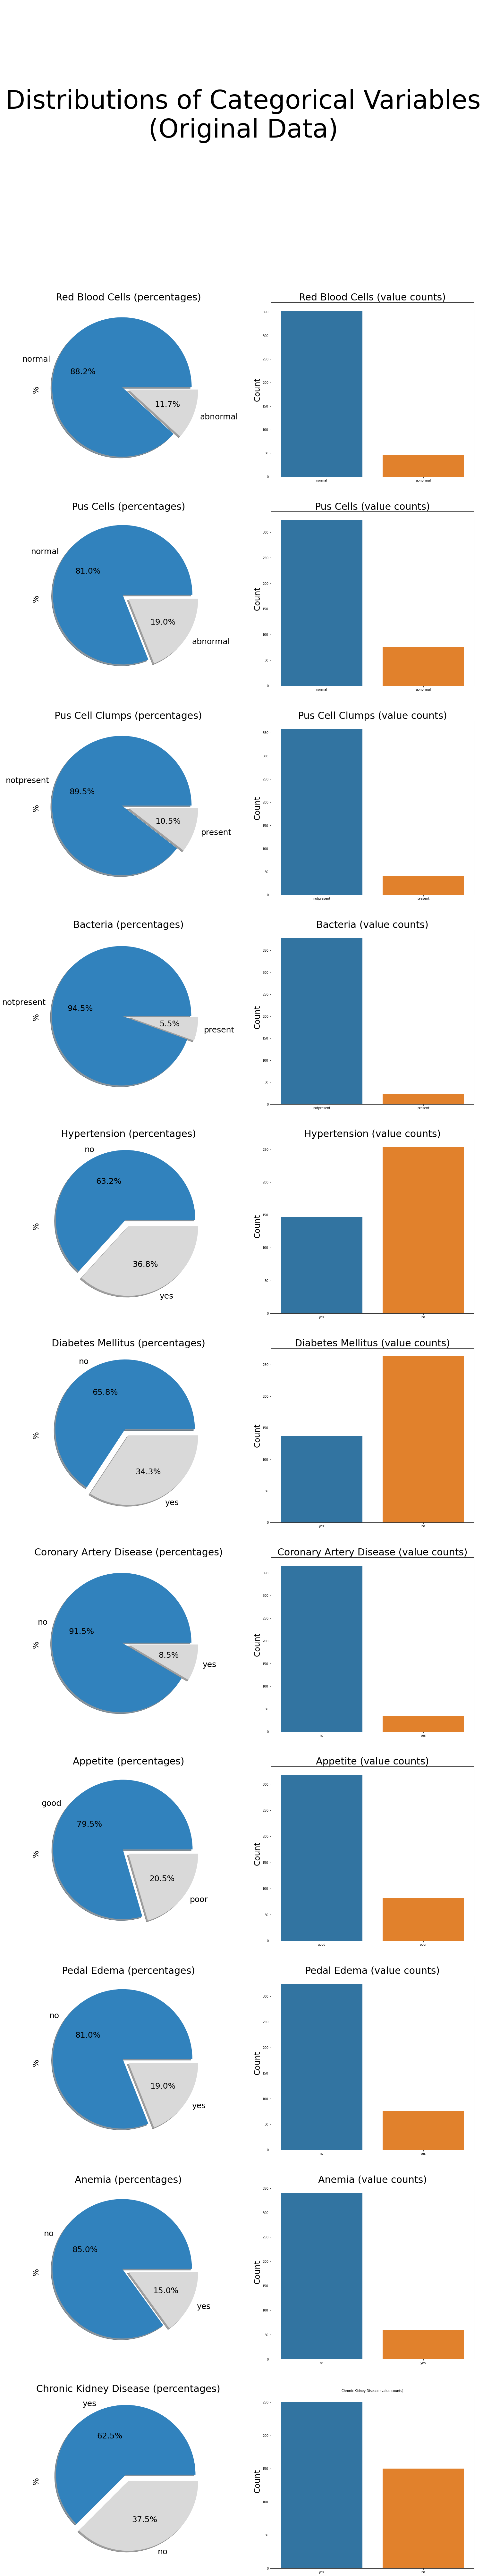

In [95]:
#塞值後觀察各欄位分布 (類別型欄位)

n_rows, n_cols = (11,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 130))
figure.suptitle('\n\n\nDistributions of Categorical Variables\n(Original Data)', fontsize=80)

#針對每一個類別型欄位
for i in range(len(categoricals)):
    column=categoricals[i]
    #畫圓餅圖
    graph1=data[column].value_counts().plot.pie(autopct='%1.1f%%',
                                                ax=axes[i,0],
                                                colormap="tab20c",
                                                fontsize=25,
                                                shadow=True,
                                                explode=[0.1,0])
    #設定圓餅圖顯示資訊
    axes[i,0].set_ylabel('%',fontsize=25)
    axes[i,0].set_title(column+' (percentages)', fontsize=30)
    
    #顯示長條圖(bar-chart)
    graph2=sns.countplot(x=column,
                         data=data,
                         ax=axes[i,1])
    #設定長條圖顯示資訊
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Count',fontsize=25)
    axes[i,1].set_xticklabels(axes[i,1].get_xticklabels())
    axes[i,1].set_title(column+' (value counts)', fontsize=30)
    

#針對應變數欄位(Chronic Kidney Disease)進行圓餅圖
graph1=data['Chronic Kidney Disease'].value_counts().plot.pie(autopct='%1.1f%%',
                                                              ax=axes[10,0],
                                                              colormap='tab20c',
                                                              fontsize=25,
                                                              shadow=True,
                                                              explode=[0.1,0])
axes[10,0].set_ylabel("%",fontsize=25)
axes[10,0].set_title('Chronic Kidney Disease (percentages)',fontsize=30)


graph2=sns.countplot(x='Chronic Kidney Disease',
                     data=data,
                     ax=axes[10,1])
axes[10,1].set_xlabel(None,fontsize=25)
axes[10,1].set_ylabel("Count",fontsize=25)
axes[10,1].set_xticklabels(axes[10,1].get_xticklabels())
axes[10,1].set_title('Chronic Kidney Disease (value counts)', fontsize='medium')

plt.show()

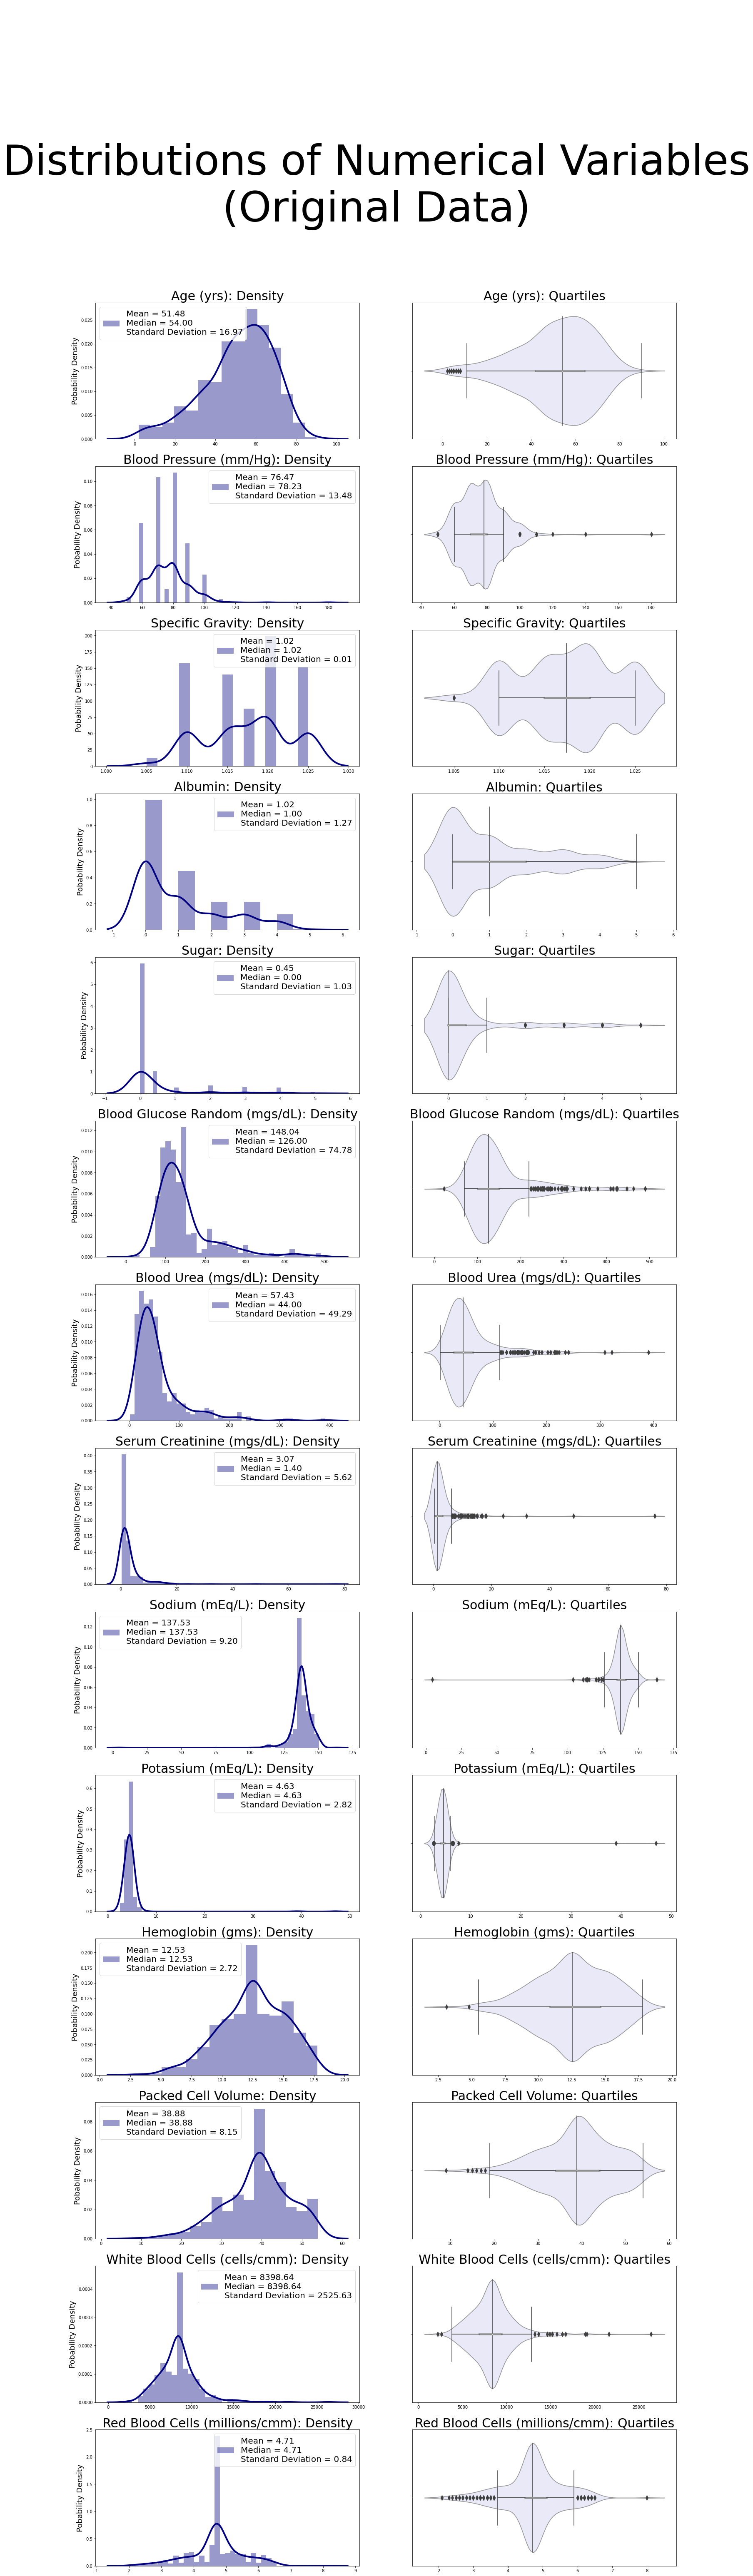

In [100]:
#塞值後觀察各欄位分布 (數值型欄位)

n_rows, n_cols = (14,2)

#圖表大小
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 100))
figure.suptitle('\n\n\nDistributions of Numerical Variables\n(Original Data)', fontsize=100)

#走訪每一個欄位
for i in range(len(numeric)):
    
    #處理的欄位
    col=numeric[i]
    
    #每個圖表都要顯示平均值、中位數、標準差
    label='Mean = {}\nMedian = {}\nStandard Deviation = {}'.format("%.2f"%data[col].mean(),
                                                                   "%.2f"%data[col].median(),
                                                                   "%.2f"%data[col].std())
    #繪製distplot圖表
    graph1=sns.distplot(data[col],
                        color="navy",
                        ax=axes[i,0],
                        kde_kws={"lw":4},
                        norm_hist=True,
                        label=label).legend(loc='best',fontsize=20)
    axes[i,0].set_title(col+': Density',fontsize=30)
    axes[i,0].set_xlabel(None)
    axes[i,0].set_ylabel("Pobability Density",fontsize=18)

    #繪製小提琴圖
    graph20=sns.violinplot(x=col,
                          data=data,
                          ax=axes[i,1],
                          color='lavender',
                          inner='box')
    #將小提琴圖內的線條補上 (25%, 50% 75% 與 IQR 與 outlier)
    graph21=sns.boxplot(x=col,
                        data=data,
                        ax=axes[i,1],
                        fliersize=8,
                        boxprops=dict(alpha=0))
    
    axes[i,1].set_xlabel(None)
    axes[i,1].set_title(col+': Quartiles',fontsize=30)
    
    
plt.show()

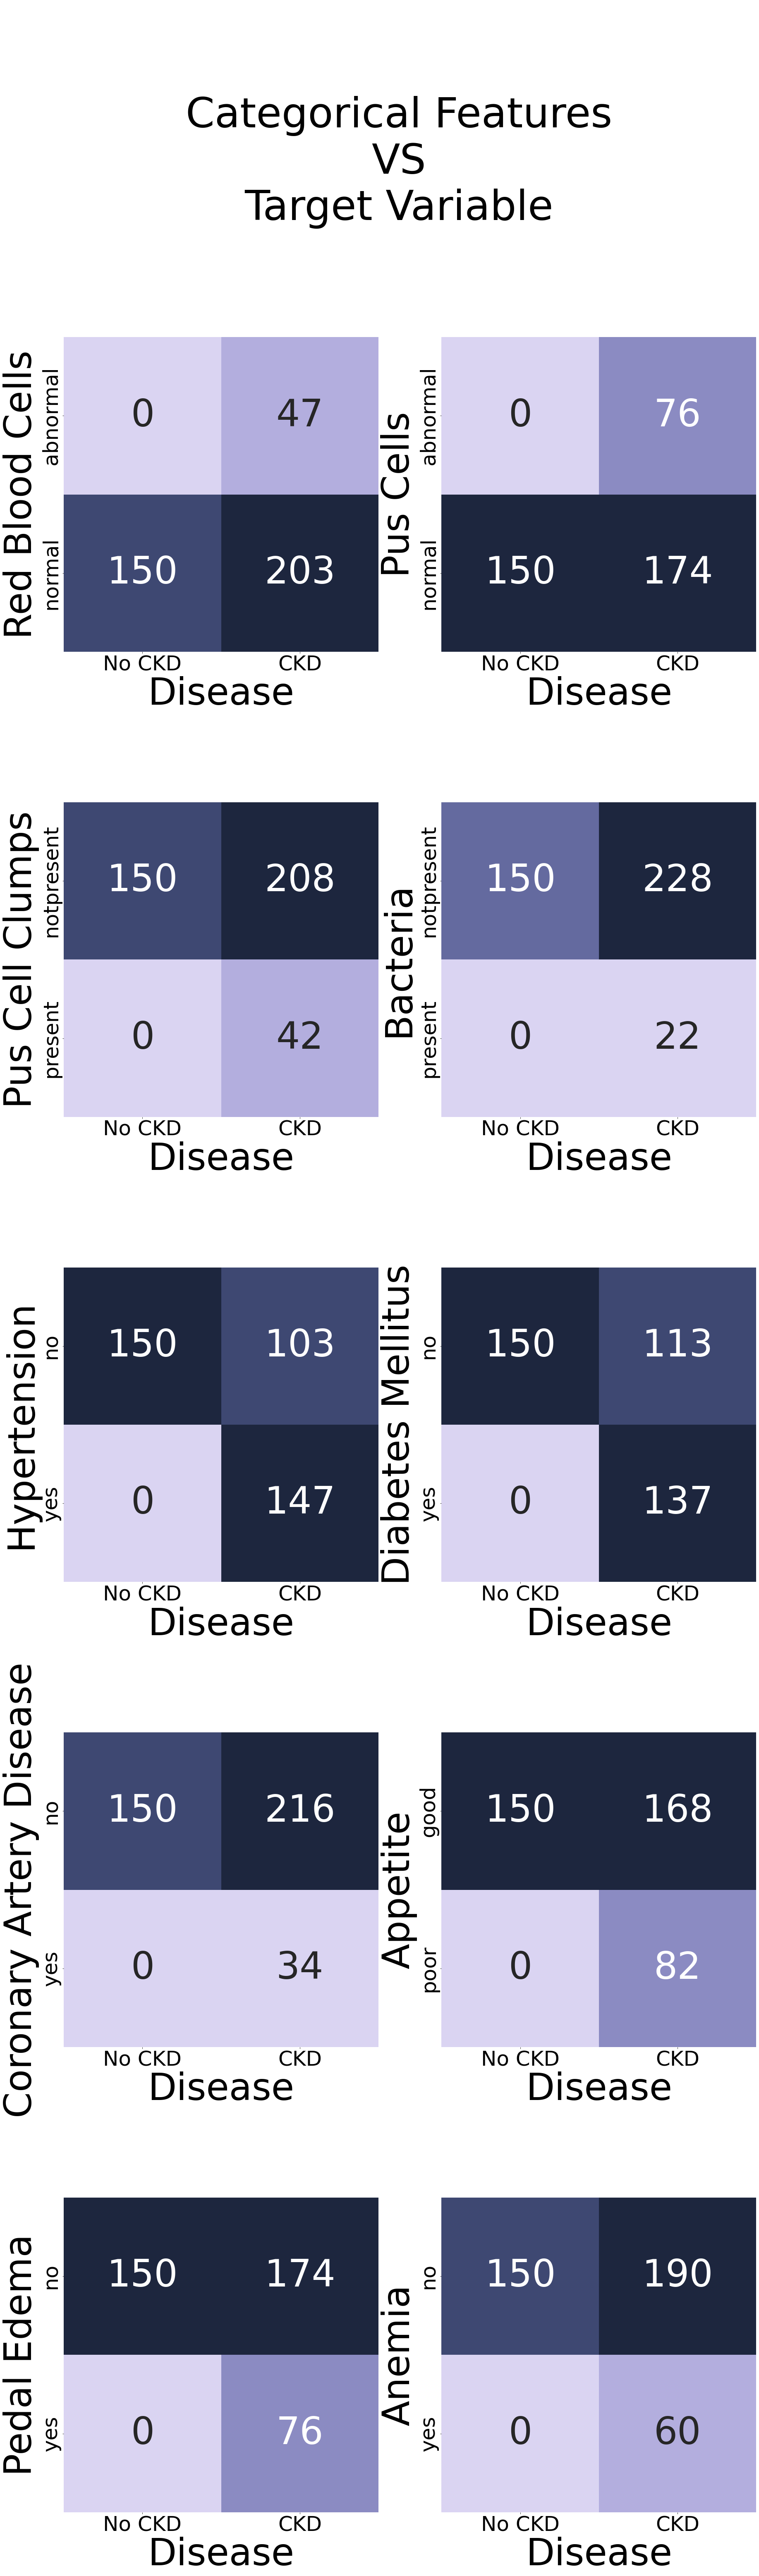

In [29]:
#類別型變數與應變數
n_rows, n_cols = (5,2)

#圖表大小
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 100))
figure.suptitle('\n\nCategorical Features\nVS\nTarget Variable', fontsize=100)

#走訪每一個欄位
for index, column in enumerate(categoricals):
    
    i,j = (index // n_cols), (index % n_cols)
    
    #繪製熱力圖
    sns.heatmap(pd.crosstab(data[column],data['Chronic Kidney Disease']),
                ax=axes[i,j],
                cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':90},
                fmt='d')
        
    axes[i,j].set_xlabel("Disease", fontsize=90)

    axes[i,j].set_ylabel(column,fontsize=90)
    
    axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=50)
    
    axes[i,j].set_xticklabels(["No CKD","CKD"],fontsize=50)

plt.show()

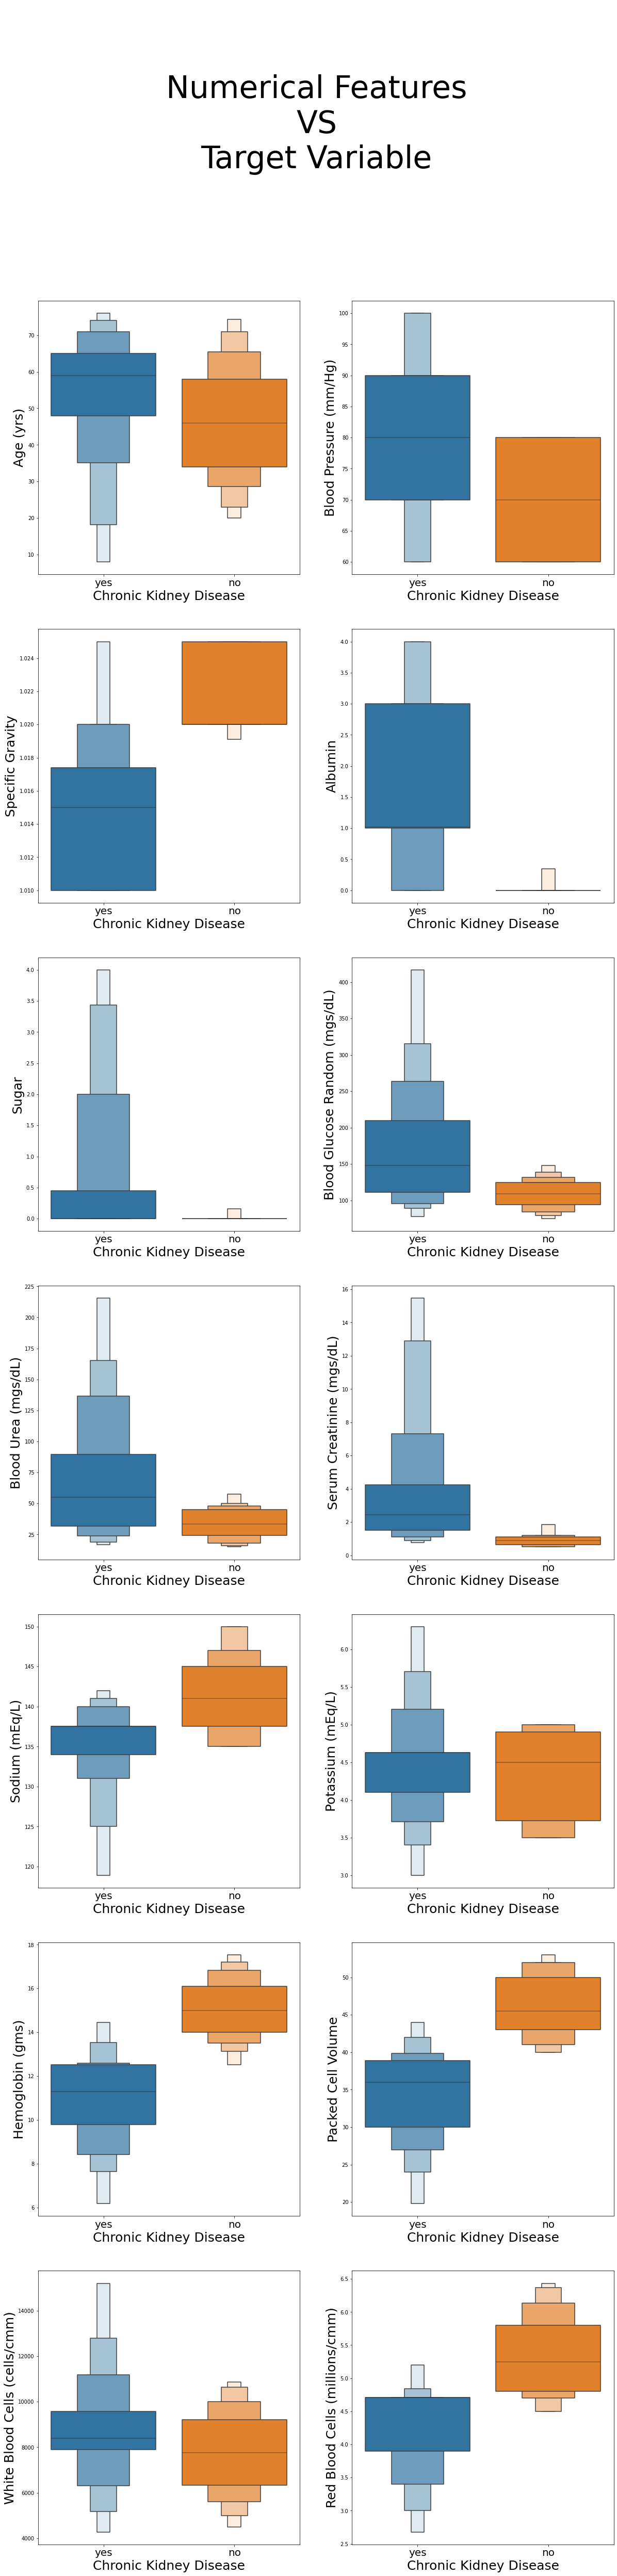

In [101]:
#連續型變數與應變數
n_rows, n_cols = (7,2)

#圖表大小
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 80))
figure.suptitle('\n\nNumerical Features\nVS\nTarget Variable', fontsize=60)

#走訪每一個欄位
for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    #繪製盒鬚圖
    bp=sns.boxenplot(y=column, x='Chronic Kidney Disease', data=data, ax=axes[i,j], showfliers=False)
        
    axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=25)

    axes[i,j].set_ylabel(column,fontsize=25)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),fontsize=20)

plt.show()

# 準備開始進行 Kmeans
# 目的是要針對腎臟病患者，進行分群分析

In [31]:
#準備資料
X=dummydata.drop("Chronic Kidney Disease: yes",axis=1,inplace=False)
y=dummydata["Chronic Kidney Disease: yes"]

print("資料筆數:",len(X))
print("欄位數量:",len(X.columns))

資料筆數: 400
欄位數量: 24


In [32]:
#提供多種scale的方式

#以下四種是最常見的標準化函數
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

SS=StandardScaler()
MS=MinMaxScaler()
RS=RobustScaler()

#設定outlier分位間距
WRS=RobustScaler(quantile_range=(15,85))


In [33]:
#scale欄位值
#選用SS方式進行

#同學們可以嘗試別的scale方式，看看分群分數上有何差別

full_scaled_data=SS.fit_transform(X)
scaled_data=SS.fit_transform(full_scaled_data)

In [34]:
from sklearn.cluster import KMeans

In [102]:
#選擇轉折點
for i in range(1,9):
    n_clusters = i
    kmean = KMeans(n_clusters=n_clusters)
    kmean.fit(scaled_data);
    print("kmean: k={}, cost={}".format(n_clusters, int(kmean.score(scaled_data))))

print("發現分群分數的結果都不好")

kmean: k=1, cost=-9600
kmean: k=2, cost=-7543
kmean: k=3, cost=-6955
kmean: k=4, cost=-6588
kmean: k=5, cost=-6176
kmean: k=6, cost=-5821
kmean: k=7, cost=-5584
kmean: k=8, cost=-5334
發現分群分數的結果都不好


# 假設，有可能欄位存在太多共線性，造成overfitting

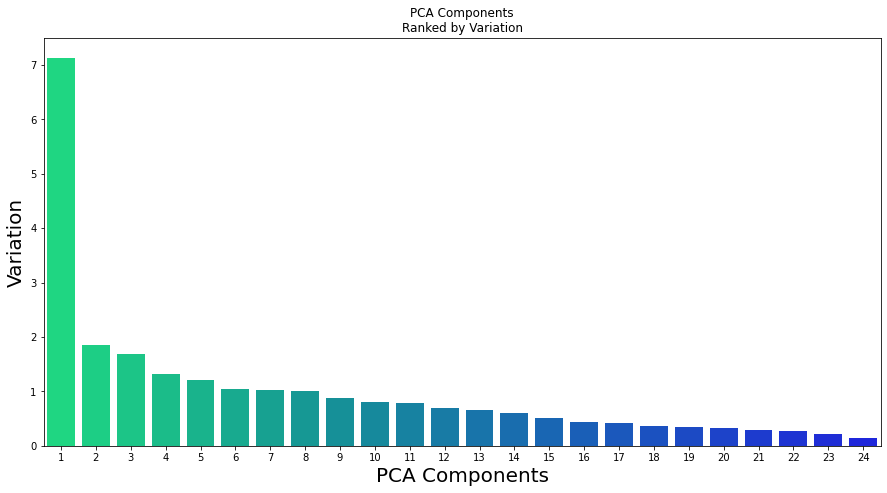

發現PC為1的時候，Variation最高


In [104]:
#採用降維方式 (主成分分析)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

#繪圖24個欄位
pca_features=list(range(1,25))

#圖表大小
ax=plt.figure(figsize=(15,7.5))

#繪製barplot圖表
sns.barplot(pca_features, pca.explained_variance_,palette="winter_r")

#圖表相關顯示資訊
plt.ylabel('Variation',fontsize=20)
plt.xlabel('PCA Components',fontsize=20)
plt.title("PCA Components\nRanked by Variation")
plt.show()

print("發現PC為1的時候，Variation最高")

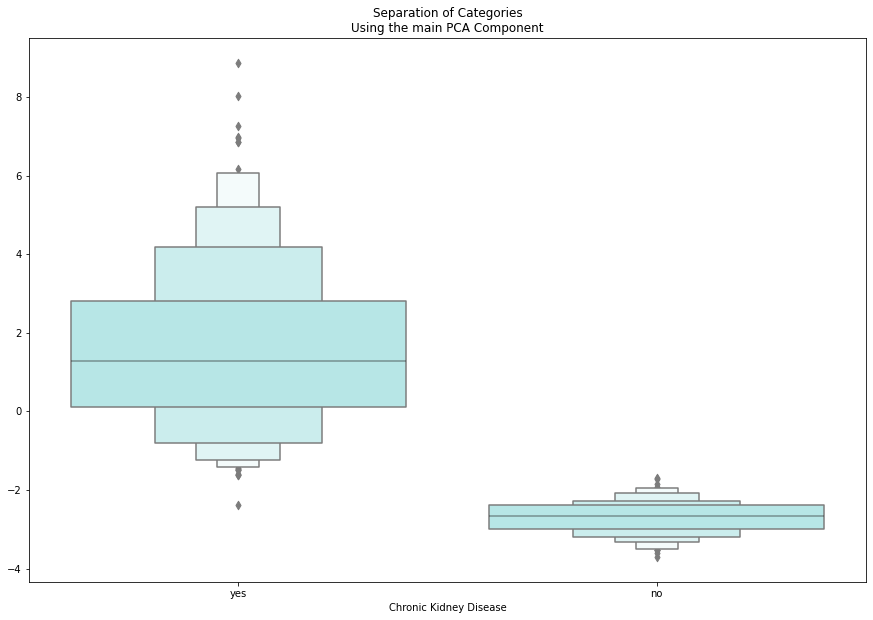

In [37]:
#繪製降維後的值，看看是否可以明顯區分出應變數(Yes/No)

#採用PC為1 (n_components=1)
pca1=PCA(n_components=1)

#採用scale過後的資料
pca1_data=pca1.fit_transform(scaled_data)

#圖表大小
plt.figure(figsize=(15,10))

#轉置資料
pca1_data=pca1_data.reshape((400,))

#繪製盒鬚圖
bp=sns.boxenplot(y=pca1_data, x=data['Chronic Kidney Disease'], color="paleturquoise",showfliers=True)
plt.title("Separation of Categories\nUsing the main PCA Component")
plt.show()

轉折點目前發現7可以試試看作為K值


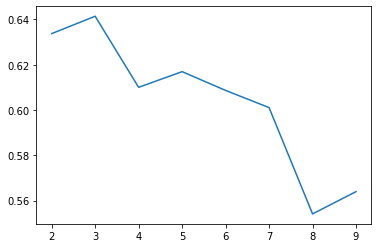

In [107]:
#透過輪廓係數找出轉折點 (elbow)
#轉折點就是用來設定分群數量之用 (K值)
from sklearn.metrics import silhouette_score

#轉置資料
pca1_data=pca1_data.reshape(-1,1)

silhouette_avg = []

#由第2群找到第10群，觀察轉折點 (轉折點就是變化量最大的地方，不是看該值的大小)
for i in range(2,10):
    kmeans_fit = KMeans(n_clusters = i).fit(pca1_data)
    silhouette_avg.append(silhouette_score(pca1_data, kmeans_fit.labels_))
    
plt.plot(range(2,10), silhouette_avg)

print("轉折點目前發現{}可以試試看作為K值".format(7))

In [108]:
#選擇分群數量(K值為7)
n_clusters = 7

#建立Kmeans演算法
kmean = KMeans(n_clusters=n_clusters)

#轉置資料
pca1_data=pca1_data.reshape(-1,1)

#帶入降維後的資料
kmean.fit(pca1_data);
print("kmean: k={}, cost={}".format(n_clusters, int(kmean.score(pca1_data))))

#取得分群結果 (每筆資料都會一個分群代碼，由0開始)
labels = kmean.labels_

#取得分群的中心點(質心)
centers = kmean.cluster_centers_

kmean: k=7, cost=-70


In [109]:
#將分群結果寫入dataframe，有利於分群分析
data['group']=labels
data

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease,group
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,7800.0,5.200000,yes,yes,no,good,no,no,yes,6
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,6000.0,4.707435,no,no,no,good,no,no,yes,6
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,7500.0,4.707435,no,yes,no,poor,no,yes,yes,3
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,6700.0,3.900000,yes,no,no,poor,yes,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,7300.0,4.600000,no,no,no,good,no,no,yes,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,6700.0,4.900000,no,no,no,good,no,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,7800.0,6.200000,no,no,no,good,no,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,6600.0,5.400000,no,no,no,good,no,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,7200.0,5.900000,no,no,no,good,no,no,no,1


In [113]:
#查看個群數量，由第0群開始排序
data['group'].value_counts().sort_index()


0     31
1    148
2     65
3     38
4     14
5     56
6     48
Name: group, dtype: int64

# 作業

In [59]:
#hw(這是第0群)

#請觀查這些變數(透過平均值、中位數...敘述型統計)，給予該群一個名稱定義 (例如: 代謝症候群等等)
#並且對於該群給予醫療上的建議與衛教方式
#可透過文字或視覺化圖表表示之

#提示: 也可以參考該群內的腎臟病患者比例 (Yes/No)

data[data['group']==0]

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease,group
5,60.0,90.0,1.015000,3.000000,0.000000,normal,normal,notpresent,notpresent,74.000000,...,7800.000000,4.400000,yes,yes,no,good,yes,no,yes,0
6,68.0,70.0,1.010000,0.000000,0.000000,normal,normal,notpresent,notpresent,100.000000,...,8398.639456,4.707435,no,no,no,good,no,no,yes,0
17,47.0,80.0,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,114.000000,...,8398.639456,4.707435,yes,no,no,poor,no,no,yes,0
23,21.0,70.0,1.010000,0.000000,0.000000,normal,normal,notpresent,notpresent,148.036517,...,8398.639456,4.707435,no,no,no,poor,no,yes,yes,0
25,61.0,60.0,1.025000,0.000000,0.000000,normal,normal,notpresent,notpresent,108.000000,...,8400.000000,3.700000,yes,yes,no,good,no,yes,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,57.0,80.0,1.015000,0.000000,0.000000,normal,normal,notpresent,notpresent,120.000000,...,7200.000000,3.800000,yes,yes,no,good,no,no,yes,0
232,50.0,90.0,1.015000,1.000000,0.000000,abnormal,abnormal,notpresent,notpresent,148.036517,...,8398.639456,4.707435,no,no,no,good,yes,no,yes,0
233,51.0,100.0,1.015000,2.000000,0.000000,normal,normal,notpresent,present,93.000000,...,8398.639456,4.707435,no,no,no,poor,no,no,yes,0
241,57.0,70.0,1.015000,1.000000,0.000000,normal,abnormal,notpresent,notpresent,165.000000,...,4200.000000,3.900000,no,no,no,good,no,no,yes,0


In [60]:
#hw(這是第1群)

data[data['group']==1]

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease,group
102,17.0,60.0,1.010,0.0,0.0,normal,normal,notpresent,notpresent,92.0,...,7000.0,4.707435,no,no,no,good,no,no,yes,1
250,40.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,10400.0,4.500000,no,no,no,good,no,no,no,1
251,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,70.0,...,9800.0,5.000000,no,no,no,good,no,no,no,1
252,45.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,82.0,...,9100.0,4.700000,no,no,no,good,no,no,no,1
253,57.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,119.0,...,6200.0,6.200000,no,no,no,good,no,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,6700.0,4.900000,no,no,no,good,no,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,7800.0,6.200000,no,no,no,good,no,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,6600.0,5.400000,no,no,no,good,no,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,7200.0,5.900000,no,no,no,good,no,no,no,1


In [ ]:
#hw(這是第2群)

data[data['group']==2]

In [ ]:
#依序輸入各群資料進行分析